<a href="https://colab.research.google.com/github/KevinSpadesAce/Colab-notebooks/blob/main/DataUnderstandingPreparationFeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Understanding, Data Preparation & Feature Engineering  
### Module tutor: Dr Ruohan Zhang


This practical session is designed to accompany the lectures on:

- **Data Understanding**
- **Data Preparation**
- **Feature Engineering**

You will follow a structured workflow that mirrors what we covered in the lecture slides.

# 0️⃣ Introduction

In this workshop, we will:

- Load and inspect a dataset
- Identify key data quality issues
- Explore the data visually and statistically
- Handle missing values
- Encode categorical variables
- Scale numerical variables
- Create new engineered features (BMI)
- Practice with 5 structured exercises

The goal is to help you build confidence with Python-based data analysis and preparation techniques commonly used in machine learning workflows.

# 1️⃣ Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2️⃣ Create Example Dataset

We will use a small healthcare dataset to practice core skills. This dataset mirrors the example in the lecture slides (Age, Gender, Height, Weight, SmokingStatus, Disease).

In [ ]:
np.random.seed(26)
n = 40

ages = np.random.randint(20, 80, size=n)
genders = np.random.choice(["Female", "Male"], size=n, p=[0.55, 0.45])
heights = np.random.normal(168, 10, size=n).astype(int)
weights = np.random.normal(70, 15, size=n)

smoking_status = np.random.choice(
    ["Never", "Former", "Current"],
    size=n,
    p=[0.5, 0.25, 0.25]
)

disease = np.random.choice(
    ["Y", "N"],
    size=n,
    p=[0.35, 0.65]
)

df = pd.DataFrame({
    "Age": ages,
    "Gender": genders,
    "Height_cm": heights,
    "Weight_kg": weights,
    "SmokingStatus": smoking_status,
    "Disease": disease
})

# Randomly generate 5 NaN molecules in Weight_kg.
weight_nan_idx = np.random.choice(df.index, 5, replace=False)
df.loc[weight_nan_idx, "Weight_kg"] = np.nan

# Randomly generate 2 NaNs in SmokingStatus
smoke_nan_idx = np.random.choice(df.index, 2, replace=False)
df.loc[smoke_nan_idx, "SmokingStatus"] = np.nan

# Randomly generate 2 NaNs in Disease.
disease_nan_idx = np.random.choice(df.index, 2, replace=False)
df.loc[disease_nan_idx, "Disease"] = np.nan

df


,Age,Gender,Height_cm,Weight_kg,SmokingStatus,Disease
0,73,Female,166,98.989312,Current,Y
1,26,Male,166,72.073097,Never,N
2,68,Female,172,73.103718,Never,Y
3,21,Male,169,73.818070,Current,N
4,58,Male,147,100.388970,Current,Y
5,39,Male,171,48.798126,Current,N
6,33,Female,170,74.108334,Former,N
7,46,Male,168,NaN,Never,N
8,52,Male,153,87.519539,Never,Y
9,24,Male,181,98.791877,Never,Y


In [ ]:
df.isna().sum()

,0
Age,0
Gender,0
Height_cm,0
Weight_kg,5
SmokingStatus,2
Disease,2


# 3️⃣ Data Understanding

This step answers: “What is in the dataset?”
Before preparing the data, we should understand it.

## 3.1 First Look at the Data

In [ ]:
df.head()

,Age,Gender,Height_cm,Weight_kg,SmokingStatus,Disease
0,73,Female,166,98.989312,Current,Y
1,26,Male,166,72.073097,Never,N
2,68,Female,172,73.103718,Never,Y
3,21,Male,169,73.818070,Current,N
4,58,Male,147,100.388970,Current,Y


Explanation

* Displays the first 5 rows
* Confirms that data loaded correctly
* Helps us spot obvious issues

## 3.2 Shape, Data Types, Missing Values

In [ ]:
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values per Column:\n", df.isna().sum())

Shape: (40, 6)

Data Types:
 Age                int64
Gender            object
Height_cm          int64
Weight_kg        float64
SmokingStatus     object
Disease           object
dtype: object

Missing Values per Column:
 Age              0
Gender           0
Height_cm        0
Weight_kg        5
SmokingStatus    2
Disease          2
dtype: int64


Explanation

* shape tells us rows and columns
* dtypes shows numeric vs categorical types
* isna().sum() helps locate missing values

## 3.3 Summary Statistics

In [ ]:
df.describe(include="all")

,Age,Gender,Height_cm,Weight_kg,SmokingStatus,Disease
count,40.000000,40,40.000000,35.000000,38,38
unique,NaN,2,NaN,NaN,3,2
top,NaN,Male,NaN,NaN,Never,N
freq,NaN,22,NaN,NaN,22,24
mean,52.800000,NaN,166.600000,71.423441,NaN,NaN
std,17.043233,NaN,9.369344,16.541574,NaN,NaN
min,21.000000,NaN,147.000000,45.406862,NaN,NaN
25%,37.750000,NaN,161.500000,60.797254,NaN,NaN
50%,53.000000,NaN,166.000000,69.802603,NaN,NaN
75%,67.250000,NaN,173.250000,76.515033,NaN,NaN


This summary shows:
* Numerical statistics: Mean, median, std dev, minimum and maximum
* Categorical summaries: Count of each category, and number of unique values

This helps us understand the dataset's distribution and identify inconsistencies.

**BUT unfortunately, there are Nans in this dataset. We will fix it later.**

## 3.4 Check for Duplicate Rows

In [ ]:
df.duplicated().sum()

np.int64(0)

**Why This Matters**

Duplicate rows can:

* Bias the analysis
* Inflate model performance
* Misrepresent real-world distributions

## 3.5 Visualizing the Data
Histogram of Age

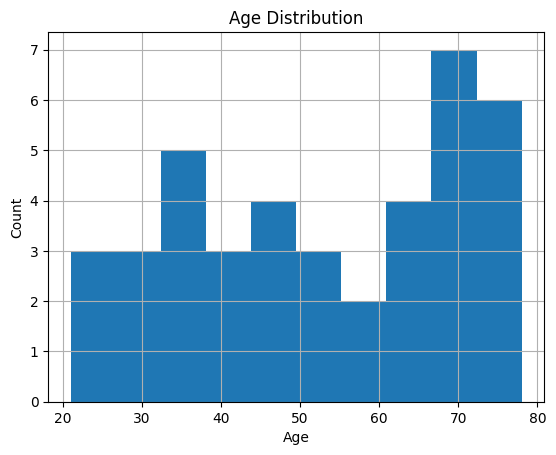

In [ ]:
df["Age"].hist()
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Boxplot of Weight

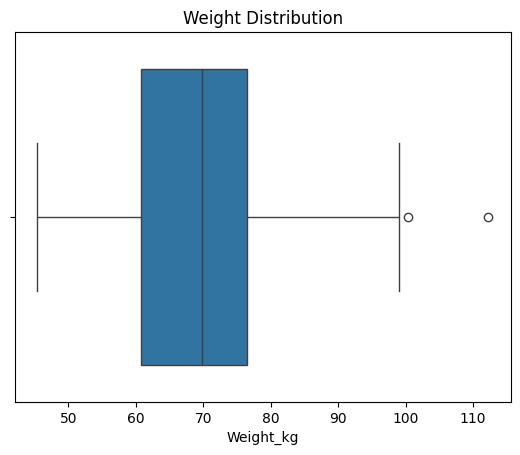

In [ ]:
sns.boxplot(x=df["Weight_kg"])
plt.title("Weight Distribution")
plt.show()

Bar Chart of Smoking Status

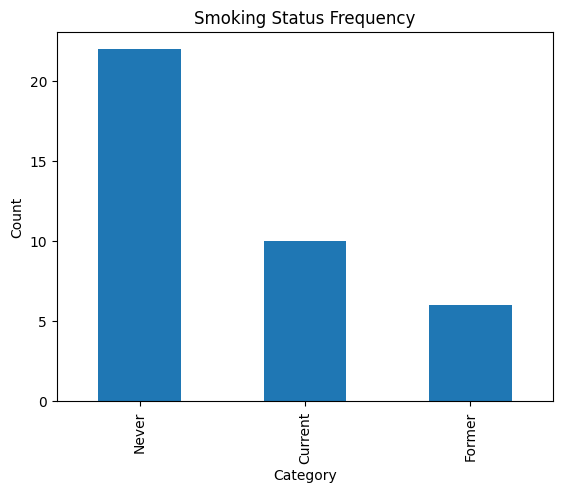

In [ ]:
df["SmokingStatus"].value_counts().plot(kind="bar")
plt.title("Smoking Status Frequency")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

Visual checks help reveal:

* Skewed features
* Outliers
* Imbalanced categories

# 4️⃣ Data Preparation

Once we understand the data, we clean and prepare it for modelling.

## 4.1 Handling Missing Values


**Option 1: Remove Rows with Missing Values (Only if missing is small)**

When to use:
* The missing proportion is small (e.g., < 5–10%)
* The rows do not contain important information
* Dataset is large

When not to use:
* Small datasets
* Important variables have missing values
* Missingness is systematic

In [ ]:
df.isna().sum()

df_clean = df.dropna()
print(df_clean)

print("Original shape:", df.shape)
print("After dropna:", df_clean.shape)


    Age  Gender  Height_cm   Weight_kg SmokingStatus Disease
0    73  Female        166   98.989312       Current       Y
1    26    Male        166   72.073097         Never       N
2    68  Female        172   73.103718         Never       Y
3    21    Male        169   73.818070       Current       N
4    58    Male        147  100.388970       Current       Y
5    39    Male        171   48.798126       Current       N
6    33  Female        170   74.108334        Former       N
8    52    Male        153   87.519539         Never       Y
9    24    Male        181   98.791877         Never       Y
10   54    Male        154   65.306190       Current       N
11   65    Male        159   72.142941         Never       N
12   37    Male        178   59.774524         Never       N
13   75  Female        154  112.249668         Never       N
14   71    Male        150   71.405272         Never       Y
16   45  Female        166   45.728603         Never       N
17   72    Male        1

**Option 2: Impute Missing Values (Recommended)**
Instead of dropping missing rows, we can fill them in using various strategies:

Numerical columns → mean or median

Categorical columns → mode (most frequent category)

In [ ]:
# Step 1: Identify numeric and categorical columns
num_cols = df_clean.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df_clean.select_dtypes(include=["object"]).columns

# Step 2: Impute numeric columns using mean
df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].mean())

# Step 3: Impute categorical columns using mode
df_clean[cat_cols] = df_clean[cat_cols].fillna(df_clean[cat_cols].mode().iloc[0])

# Step 4: Check if missing values remain
df_clean.isna().sum()

print("Current shape:", df.shape)

Current shape: (40, 6)


/tmp/ipython-input-1396664255.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].mean())
/tmp/ipython-input-1396664255.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[cat_cols] = df_clean[cat_cols].fillna(df_clean[cat_cols].mode().iloc[0])


# 4.2 Encoding Categorical Variables

Machine learning models require numerical input.
We convert categorical variables using:

* Label Encoding for binary categories
* One-Hot Encoding for multi-category variables

In [ ]:
# Label encoding for Disease
df_clean.loc[:, "Disease"] = df_clean["Disease"].map({"Y": 1, "N": 0})

# One-hot encoding for Gender and SmokingStatus
df_encoded = pd.get_dummies(
    df_clean,
    columns=["Gender", "SmokingStatus"],
    drop_first=True
)

df_encoded.head()


,Age,Height_cm,Weight_kg,Disease,Gender_Male,SmokingStatus_Former,SmokingStatus_Never
0,73,166,98.989312,1,False,False,False
1,26,166,72.073097,0,True,False,True
2,68,172,73.103718,1,False,False,True
3,21,169,73.818070,0,True,False,False
4,58,147,100.388970,1,True,False,False


# 4.3 Feature Scaling

Scaling improves model performance, especially for methods like:
* Logistic Regression
* K-Means
* PCA

We use StandardScaler.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

df_scaled.head()


,Age,Height_cm,Weight_kg,Disease,Gender_Male,SmokingStatus_Former,SmokingStatus_Never
0,1.233744,-0.029133,1.662267,1,False,False,False
1,-1.463278,-0.029133,0.013745,0,True,False,True
2,0.946827,0.592363,0.076866,1,False,False,True
3,-1.750195,0.281615,0.120618,0,True,False,False
4,0.372992,-1.997203,1.747991,1,True,False,False


# 5️⃣ Feature Engineering

Feature engineering improves the quality and predictive power of data.

## 5.1 Feature Creation (Example: BMI)

In [ ]:
df_clean["BMI"] = df_clean["Weight_kg"] / (df_clean["Height_cm"]/100)**2
df_clean[["Height_cm", "Weight_kg", "BMI"]]


/tmp/ipython-input-4289272459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["BMI"] = df_clean["Weight_kg"] / (df_clean["Height_cm"]/100)**2


,Height_cm,Weight_kg,BMI
0,166,98.989312,35.922961
1,166,72.073097,26.155138
2,172,73.103718,24.710559
3,169,73.818070,25.845758
4,147,100.388970,46.457018
5,171,48.798126,16.688255
6,170,74.108334,25.643022
8,153,87.519539,37.387133
9,181,98.791877,30.155330
10,154,65.306190,27.536764


**Why BMI?**

BMI combines height and weight into a more meaningful health indicator than either alone.

## 5.2 Simple Feature Selection

We can examine correlations:

In [ ]:
df_clean.corr(numeric_only=True)["BMI"].sort_values(ascending=False)


,BMI
BMI,1.000000
Weight_kg,0.906175
Age,0.364965
Height_cm,-0.630443


Features with high absolute correlations may be:

* Important predictors
* Candidates for deeper analysis

Features with low correlation may be removed to reduce noise.

We will look into these points in the following sessions.

# 6️⃣ Exercises
You now have 3 exercises at ascending difficulty levels.

**Exercise 1： Online Retail Orders (Beginner Level)**

**Task Description**

You are given a small dataset of online retail orders. It includes customer age, order amount, number of items, and membership status. Some values are missing.

Your tasks:
* Generate the dataset below.
* Check for missing values.
* Remove rows that contain any missing values.

Calculate:
* Average order amount
* Largest and smallest order
* Find which membership category (“Basic”, “Silver”, “Gold”) has the highest average order amount.

In [ ]:
# dataset
np.random.seed(100)

df1 = pd.DataFrame({
    "CustomerAge": np.random.randint(18, 70, 12),
    "Membership": np.random.choice(["Basic", "Silver", "Gold"], 12),
    "OrderAmount": np.random.normal(120, 40, 12),
    "ItemsPurchased": np.random.randint(1, 6, 12)
})

# introduce missing values
df1.loc[np.random.choice(df1.index, 2, replace=False), "OrderAmount"] = np.nan
df1.loc[np.random.choice(df1.index, 1, replace=False), "ItemsPurchased"] = np.nan

df1


,CustomerAge,Membership,OrderAmount,ItemsPurchased
0,26,Gold,130.640654,4.0
1,42,Gold,115.448213,3.0
2,21,Silver,160.442646,4.0
3,57,Basic,62.369153,1.0
4,41,Basic,159.222766,2.0
5,33,Basic,175.079852,NaN
6,66,Basic,NaN,5.0
7,28,Gold,139.236965,3.0
8,48,Basic,69.323577,1.0
9,52,Silver,130.840204,1.0


In [ ]:
# ============================ Please write your answer below ============================

In [ ]:
# 1. Missing values
print("Step 1: Missing values per column")
print(df1.isna().sum())
print("-" * 40)

# 2. Remove missing rows
df1_clean = df1.dropna()
print("Step 2: Data after dropping rows with any missing values")
print(df1_clean)
print("-" * 40)

# 3. Summary statistics for OrderAmount
mean_order = df1_clean["OrderAmount"].mean()
min_order = df1_clean["OrderAmount"].min()
max_order = df1_clean["OrderAmount"].max()

print("Step 3: Summary statistics for OrderAmount (after cleaning)")
print(f"Mean order amount: {mean_order:.2f}")
print(f"Minimum order amount: {min_order:.2f}")
print(f"Maximum order amount: {max_order:.2f}")
print("-" * 40)

# 4. Membership group comparison
group_means = df1_clean.groupby("Membership")["OrderAmount"].mean()
print("Step 4: Average order amount by membership type")
print(group_means)
print("-" * 40)

# 5. Highest-spending membership
top_membership = group_means.idxmax()
print("Step 5: Membership type with the highest average order amount")
print(top_membership)


Step 1: Missing values per column
CustomerAge       0
Membership        0
OrderAmount       2
ItemsPurchased    1
dtype: int64
----------------------------------------
Step 2: Data after dropping rows with any missing values
    CustomerAge Membership  OrderAmount  ItemsPurchased
0            26       Gold   130.640654             4.0
1            42       Gold   115.448213             3.0
2            21     Silver   160.442646             4.0
3            57      Basic    62.369153             1.0
4            41      Basic   159.222766             2.0
7            28       Gold   139.236965             3.0
8            48      Basic    69.323577             1.0
9            52     Silver   130.840204             1.0
11           52       Gold   139.014762             3.0
----------------------------------------
Step 3: Summary statistics for OrderAmount (after cleaning)
Mean order amount: 122.95
Minimum order amount: 62.37
Maximum order amount: 160.44
-------------------------------

**Exercise 2： Ride-Sharing Trips (Intermediate Level)**

**Task Description**

A ride-sharing platform collected data on user trips. The dataset includes distance, duration, pickup time, rider type, and fare. Some values are missing.

**Your tasks:**

1. Count missing values in each column.

2. Impute:
* Missing Fare using median
* Missing RiderType using most frequent

3. Create two new features:
* Speed_kmh = (Distance_km / Duration_min) * 60
* IsPeakHour: 1 if PickupHour is between 7–9 or 17–19, else 0

4. Calculate average speed by RiderType and PeakHour.

5. Identify which RiderType travels fastest during peak hours.

In [ ]:
# dataset
np.random.seed(200)

df2 = pd.DataFrame({
    "Distance_km": np.random.uniform(1, 25, 40),
    "Duration_min": np.random.uniform(5, 60, 40),
    "PickupHour": np.random.randint(0, 24, 40),
    "RiderType": np.random.choice(["Economy", "Premium", "Pool"], 40),
    "Fare": np.random.uniform(5, 60, 40)
})

# introduce missing values
df2.loc[np.random.choice(df2.index, 5, replace=False), "Fare"] = np.nan
df2.loc[np.random.choice(df2.index, 3, replace=False), "RiderType"] = np.nan

df2


,Distance_km,Duration_min,PickupHour,RiderType,Fare
0,23.743174,15.322903,16,Pool,35.729405
1,6.437138,28.047633,5,NaN,32.060112
2,15.266083,41.629940,4,Pool,38.006941
3,11.279408,33.457649,10,Premium,55.636025
4,19.339376,51.997089,22,Premium,NaN
5,1.068654,14.405622,6,Premium,37.421511
6,9.578168,58.798718,9,Premium,39.992162
7,22.832677,21.569505,6,Economy,59.241386
8,11.945944,17.784700,14,Economy,44.348967
9,24.563265,48.541503,7,Pool,28.822581


In [ ]:
# ============================ Please write your answer below ============================

In [ ]:
from sklearn.impute import SimpleImputer

# 1. Missing summary
print("Step 1: Missing values per column")
print(df2.isna().sum())
print("-" * 40)

# 2. Imputation
print("Step 2: Performing imputation...")

# Median imputation for Fare
median_imp = SimpleImputer(strategy="median")
df2["Fare"] = median_imp.fit_transform(df2[["Fare"]])

# Mode imputation for RiderType
mode_imp = SimpleImputer(strategy="most_frequent")
df2["RiderType"] = mode_imp.fit_transform(df2[["RiderType"]]).ravel()

print("After imputation:")
print(df2.isna().sum())   # confirm no missing values
print("-" * 40)


# 3. Feature engineering
print("Step 3: Feature Engineering")

df2["Speed_kmh"] = (df2["Distance_km"] / df2["Duration_min"]) * 60
df2["IsPeakHour"] = df2["PickupHour"].apply(lambda x: 1 if (7 <= x <= 9) or (17 <= x <= 19) else 0)

print("New columns added: Speed_kmh, IsPeakHour")
print(df2[["Distance_km", "Duration_min", "Speed_kmh", "PickupHour", "IsPeakHour"]].head())
print("-" * 40)

# 4. Grouped speed analysis
print("Step 4: Average Speed by RiderType and PeakHour")
group_speed = df2.groupby(["RiderType", "IsPeakHour"])["Speed_kmh"].mean()
print(group_speed)
print("-" * 40)

# 5. Fastest RiderType in peak hour
print("Step 5: Fastest RiderType during Peak Hour (IsPeakHour=1)")
fastest = group_speed.xs(1, level="IsPeakHour").idxmax()
print("Fastest RiderType during peak hour:", fastest)
print("-" * 40)


Step 1: Missing values per column
Distance_km     0
Duration_min    0
PickupHour      0
RiderType       3
Fare            5
dtype: int64
----------------------------------------
Step 2: Performing imputation...
After imputation:
Distance_km     0
Duration_min    0
PickupHour      0
RiderType       0
Fare            0
dtype: int64
----------------------------------------
Step 3: Feature Engineering
New columns added: Speed_kmh, IsPeakHour
   Distance_km  Duration_min  Speed_kmh  PickupHour  IsPeakHour
0    23.743174     15.322903  92.971317          16           0
1     6.437138     28.047633  13.770441           5           0
2    15.266083     41.629940  22.002554           4           0
3    11.279408     33.457649  20.227497          10           0
4    19.339376     51.997089  22.315915          22           0
----------------------------------------
Step 4: Average Speed by RiderType and PeakHour
RiderType  IsPeakHour
Economy    0             35.351802
           1             49.

**Exercise 3： Movie Ratings Analytics (Advanced Level)**

**Task Description**

A streaming platform wants to analyse movie ratings. You are given a synthetic dataset containing movie duration, release year, rating, viewer age, and genre.

**Your tasks:**
1. Add missing value indicator columns:

* Rating_missing

* Age_missing

2. Impute:

* Missing Rating using median

* Missing ViewerAge using median

3. Create new features:

* AgeGroup using pd.cut()

* IsOldMovie = 1 if Year < 2000

4. Compute correlation matrix for numerical features.

5. Identify the top 2 strongest predictors of Rating.

6. Interpret whether Duration is positively or negatively correlated with Rating based on output.

In [ ]:
# dataset
np.random.seed(300)

df3 = pd.DataFrame({
    "Duration_min": np.random.randint(70, 180, 50),
    "ReleaseYear": np.random.randint(1980, 2023, 50),
    "Rating": np.random.uniform(1, 10, 50),
    "ViewerAge": np.random.randint(12, 70, 50),
    "Genre": np.random.choice(["Drama", "Comedy", "Action", "Sci-Fi"], 50)
})

# introduce missing values
df3.loc[np.random.choice(df3.index, 6, replace=False), "Rating"] = np.nan
df3.loc[np.random.choice(df3.index, 4, replace=False), "ViewerAge"] = np.nan

df3


,Duration_min,ReleaseYear,Rating,ViewerAge,Genre
0,151,2011,8.672795,15.0,Comedy
1,167,2014,3.208460,46.0,Sci-Fi
2,91,1986,9.615304,36.0,Action
3,144,1982,8.825262,NaN,Action
4,176,1990,2.186563,61.0,Sci-Fi
5,79,2013,5.717687,69.0,Action
6,155,1993,7.551714,69.0,Comedy
7,161,2006,3.893026,NaN,Sci-Fi
8,173,2017,8.743593,45.0,Drama
9,92,2004,NaN,60.0,Comedy


In [ ]:
# ============================ Please write your answer below ============================

In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd

# 1. Missing indicators
print("Step 1: Create missing-value indicator columns")
df3["Rating_missing"] = df3["Rating"].isna().astype(int)
df3["Age_missing"] = df3["ViewerAge"].isna().astype(int)

print("Missing counts BEFORE imputation:")
print(df3[["Rating", "ViewerAge", "Rating_missing", "Age_missing"]].head())
print(df3[["Rating", "ViewerAge"]].isna().sum())
print("-" * 60)


# 2. Imputation
print("Step 2: Impute Rating and ViewerAge using median")

median_imp = SimpleImputer(strategy="median")

df3["Rating"] = median_imp.fit_transform(df3[["Rating"]]).ravel()
df3["ViewerAge"] = median_imp.fit_transform(df3[["ViewerAge"]]).ravel()

print("Missing counts AFTER imputation:")
print(df3[["Rating", "ViewerAge"]].isna().sum())
print("-" * 60)


# 3. Feature engineering
print("Step 3: Feature engineering — AgeGroup and IsOldMovie")

df3["AgeGroup"] = pd.cut(
    df3["ViewerAge"],
    bins=[0, 18, 40, 100],
    labels=["Teen", "Adult", "Senior"]
)

df3["IsOldMovie"] = (df3["ReleaseYear"] < 2000).astype(int)

print(df3[["ViewerAge", "AgeGroup", "ReleaseYear", "IsOldMovie"]].head())
print("-" * 60)


# 4. Correlation matrix
print("Step 4: Correlation matrix of numeric features")
corr = df3.corr(numeric_only=True)
print(corr)
print("-" * 60)


# 5. Top 2 predictors of Rating
print("Step 5: Top 2 strongest correlations with Rating (excluding Rating itself)")
rating_corr = corr["Rating"].sort_values(ascending=False)
print(rating_corr)

top2 = rating_corr.iloc[1:3]
print("\nTop 2 predictors of Rating:")
print(top2)
print("-" * 60)

# 6. Interpretation explanation (for students)
print("Step 6: Interpretation guideline")
print(
    "If Duration_min has a positive correlation with Rating, it means longer movies "
    "tend to receive higher ratings.\n"
    "If Duration_min has a negative correlation with Rating, it means shorter movies "
    "tend to receive higher ratings.\n"
    "Students should interpret the actual sign and magnitude based on the above table."
)


Step 1: Create missing-value indicator columns
Missing counts BEFORE imputation:
     Rating  ViewerAge  Rating_missing  Age_missing
0  8.672795       15.0               0            0
1  3.208460       46.0               0            0
2  9.615304       36.0               0            0
3  8.825262        NaN               0            1
4  2.186563       61.0               0            0
Rating       6
ViewerAge    4
dtype: int64
------------------------------------------------------------
Step 2: Impute Rating and ViewerAge using median
Missing counts AFTER imputation:
Rating       0
ViewerAge    0
dtype: int64
------------------------------------------------------------
Step 3: Feature engineering — AgeGroup and IsOldMovie
   ViewerAge AgeGroup  ReleaseYear  IsOldMovie
0       15.0     Teen         2011           0
1       46.0   Senior         2014           0
2       36.0    Adult         1986           1
3       37.5    Adult         1982           1
4       61.0   Senior       